<a id='TOC'></a>
# Tabla de Contenidos

[Construyendo Red](#Construyendo-Red-Neuronal-(Modelamiento/Diseño))

# **Importando Librerías Necesarias**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# **Simulando Datos**

In [2]:
np.random.seed(23)
# Crear Eje x
x=np.linspace(-10,10,100)
#Crear Observaciones
y=2*x+3*np.random.normal(0,1,size=len(x))

#Crear DataFrame
datos=pd.DataFrame(np.vstack((x,y)).T, columns=['x','y'])
#Ver datos
datos

,x,y
0,-10.000000,-17.999036
1,-9.797980,-19.518520
2,-9.595960,-21.524777
3,-9.393939,-15.941977
4,-9.191919,-16.278823
...,...,...
95,9.191919,18.960197
96,9.393939,13.618120
97,9.595960,20.575697
98,9.797980,16.339859


# **Visualizar Datos**

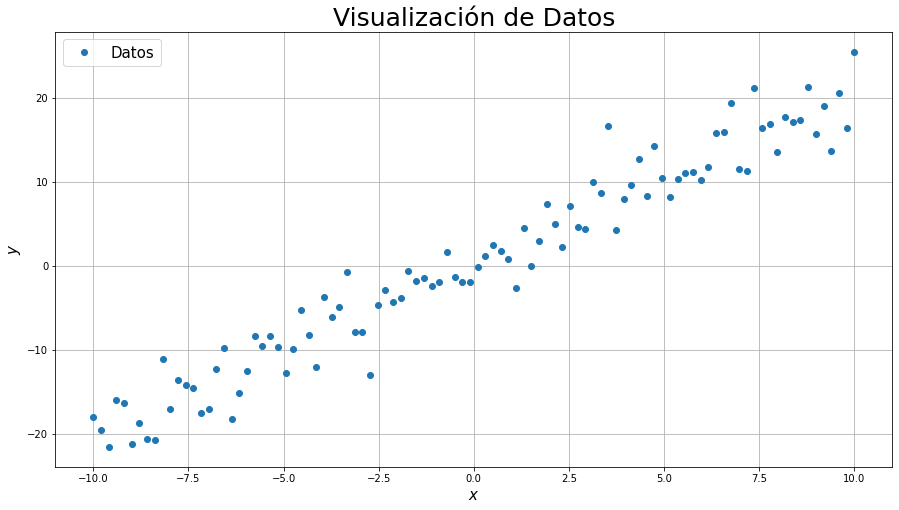

In [3]:
plt.figure(figsize=(15,8))
plt.title("Visualización de Datos",fontsize=25)
plt.plot(x,y,'o')
plt.legend(["Datos"],fontsize=15)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.grid()
plt.show()


# **Construyendo Red Neuronal (Modelamiento/Diseño)**
[Contenido](#TOC)

In [4]:
# Crear Modelo (Diseño/Arquitectura)

model = keras.Sequential([
    keras.layers.Dense(units=1,input_shape=(1,))
])

# **Compilando Red Neuronal**

In [5]:
# Compilar Modelo

model.compile(optimizer='sgd', loss='mean_squared_error')

# **Mirando el Resumen de la Red Neuronal**

In [6]:
# Resumen para tener control de los parámetros a "entrenar"
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# **Entrenando Red Neuronal (Fancy para "Hacer la Regresión")**

In [7]:
model.fit(x, y, epochs=100,verbose=0)

# **Visualizar Resultados de la Red**

In [8]:
#Obtener Pesos de la Red
w=model.get_weights()

print("\nObjeto Pesos:",w)
print('\nNumber of Weights -> '+ str(len(w)))
print('\nw1 = ' + str(w[0][0]) +'(Weight)')
print('w0 = ' + str(w[1])+'("Weight"->Bias)')
print('\nThe Model is: y = w1*x+w0:')
print('\ny = {}*x+{}'.format(w[0].item(),w[1].item()))

# Crear Modelo a las Malas
x = np.linspace(x[0],x[-1],100)
# Anonymous Function
reg = lambda x: np.transpose(w[0]*x+w[1])


Objeto Pesos: [array([[2.0872936]], dtype=float32), array([0.2659093], dtype=float32)]

Number of Weights -> 2

w1 = [2.0872936](Weight)
w0 = [0.2659093]("Weight"->Bias)

The Model is: y = w1*x+w0:

y = 2.0872936248779297*x+0.2659093141555786


# **Predecir valores DENTRO de los datos (Ver Regresión)**

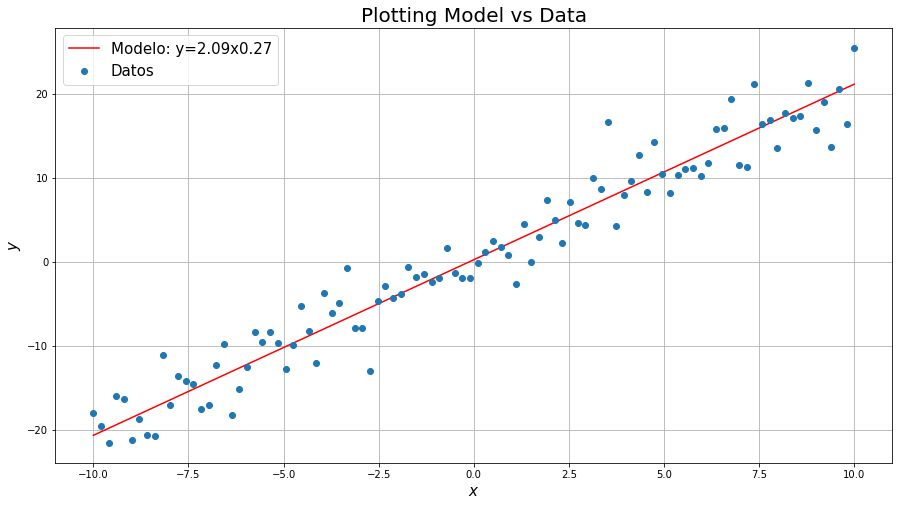

In [9]:
plt.figure(figsize=(15,8))
plt.plot(x,reg(x),'r-',label='Modelo: y={:.2f}x{:.2f}'.format(w[0].item(),w[1].item()))
plt.plot(x,y,'o', label='Datos')
plt.title('Plotting Model vs Data',fontsize=20)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.legend(loc=0,fontsize=15)
plt.grid()
plt.show()

# **Predecir valores FUERA de los datos (Usar Modelo)**

 La Predicción en x = 11 es [[23.22614]]


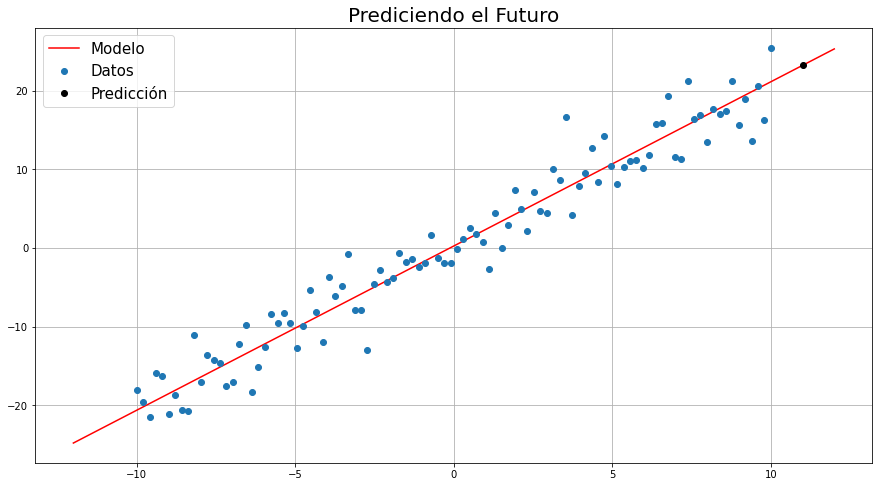

In [10]:
# Predicción

#Punto fuera de los datos de entrenamiento (MUY IMPORTANTE)
x_test=[11.0]

# Predecir valor usando el Modelo generado del entrenamiento
pred = model.predict(x_test)
print(' La Predicción en x = 11 es '+str(pred))

# Aumentar Resolución del Modelo Fuera de los Datos
x_model=np.linspace(-12,12,100)


plt.figure(figsize=(15,8))
plt.plot(x_model,reg(x_model),'r-',label='Modelo')
plt.plot(x,y,'o', label='Datos')
plt.plot(x_test,pred,'ko', label='Predicción')
plt.title('Prediciendo el Futuro',fontsize=20)
plt.legend(loc=0,fontsize=15)
plt.grid()
plt.show()